<a href="https://colab.research.google.com/github/matsunagalab/tutorial_analyzingMDdata/blob/main/03_md_geometry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geometry analysis

## MDTraj„ÅÆ„Ç§„É≥„Çπ„Éà„Éº„É´

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

‚è¨ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
üì¶ Installing...
üìå Adjusting configuration...
ü©π Patching environment...
‚è≤ Done in 0:00:24
üîÅ Restarting kernel...


In [1]:
!conda install -c conda-forge mdtraj

Channels:
 - conda-forge
Platform: linux-64
Solving environment: | / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mdtraj


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    astunparse-1.6.3           |     pyhd8ed1ab_0          15 KB  conda-forge
    blosc-1.21.5               |       hc2324a3_1          48 KB  conda-forge
    c-blosc2-2.14.4            |       hb4ffafa_1         329 KB  conda-forge
    ca-certificates-2024.8.30  |       hbcca054_0         155 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    hdf5-1.14.3                |nompi_h4f84152_100         3.7 MB  conda-forge
    libaec-1.

## T4 Lysozyme„ÅÆMD„Éá„Éº„Çø„ÅÆÂèñÂæó

`wildtype.pdb` „Å® `wildtype.dcd` „Çí„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ„Åô„Çã„ÄÇ

In [2]:
!gdown 1Lu22Z7ARKSws77sBaYr84iCcQsnTHId9
!gdown 1Eh0SSSxgAmv7LI2NvAY43tLMLI63lSa-

Downloading...
From: https://drive.google.com/uc?id=1Lu22Z7ARKSws77sBaYr84iCcQsnTHId9
To: /content/wildtype.pdb
100% 214k/214k [00:00<00:00, 78.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Eh0SSSxgAmv7LI2NvAY43tLMLI63lSa-
From (redirected): https://drive.google.com/uc?id=1Eh0SSSxgAmv7LI2NvAY43tLMLI63lSa-&confirm=t&uuid=34f269ad-08ab-49bf-a2fa-00ba8474ec11
To: /content/wildtype.dcd
100% 318M/318M [00:01<00:00, 254MB/s]


## MDTraj„Çí‰Ωø„Å£„Å¶geometry analysis

GeometryÈñ¢ÈÄ£„ÅÆÈñ¢Êï∞„ÅØ[„Éâ„Ç≠„É•„É°„É≥„Éà](https://www.mdtraj.org/1.9.7/analysis.html)„Åã„ÇâÁ¢∫Ë™ç„Åô„Çã„Åì„Å®„Åå„Åß„Åç„Åæ„Åô„ÄÇ„Åì„Åì„Åß„ÅØ„ÅÑ„Åè„Å§„Åã„ÇíÁ¥π‰ªã„Åó„Åæ„Åô„ÄÇ

In [3]:
import mdtraj as md
import numpy as np

traj = md.load('/content/wildtype.dcd', top='/content/wildtype.pdb')

ÂéüÂ≠êÈñìË∑ùÈõ¢„ÇíË®àÁÆó„Åó„Åæ„Åô

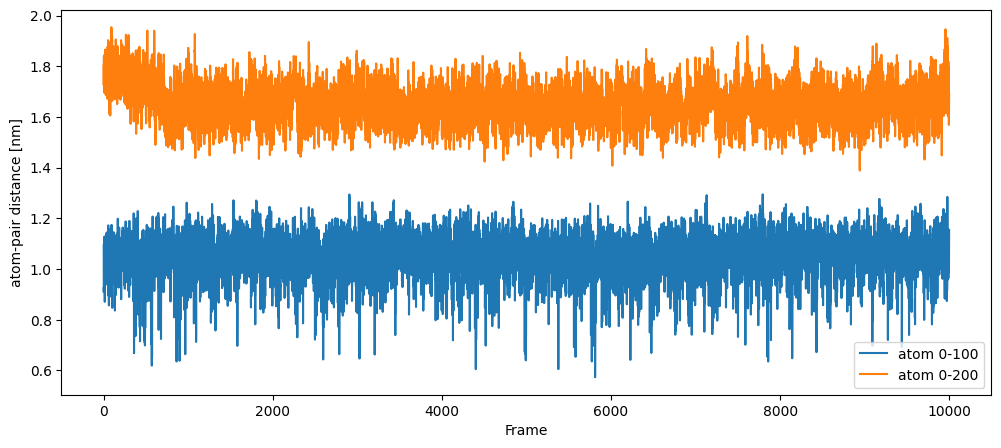

In [8]:
import matplotlib.pyplot as plt

dist = md.compute_distances(traj, [[0, 100], [0, 200]])

# Plot inter-domain distance
plt.figure(figsize=(12, 5))
plt.plot(dist)
plt.xlabel('Frame')
plt.ylabel('atom-pair distance [nm]')
plt.legend(['atom 0-100', 'atom 0-200'])
plt.show()

„Éâ„É°„Ç§„É≥Èñì„ÅÆË∑ùÈõ¢„ÇíË®àÁÆó„Åó„Åæ„Åô

In [14]:
domain2_indices = traj.topology.select('resSeq 82 to 164')
print(domain2_indices)

[1287 1288 1289 ... 2640 2641 2642]


In [15]:
traj_domain2 = traj.atom_slice(domain2_indices)
print(traj_domain2)

<mdtraj.Trajectory with 10000 frames, 1356 atoms, 83 residues, and unitcells>


In [17]:
md.compute_center_of_mass(traj_domain2).shape

(10000, 3)

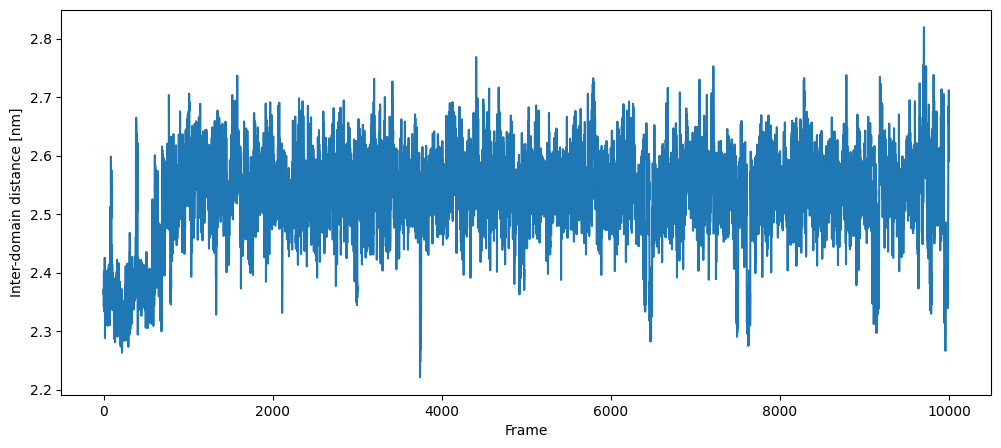

In [18]:
import matplotlib.pyplot as plt

# Define two domains using atom selections
domain1_indices = traj.topology.select('residue 1 to 60')
domain2_indices = traj.topology.select('resSeq 82 to 164')

# Compute centers of mass
domain1_com = md.compute_center_of_mass(traj.atom_slice(domain1_indices))
domain2_com = md.compute_center_of_mass(traj.atom_slice(domain2_indices))

# Calculate distance between centers of mass
com_distance = np.sqrt(np.sum((domain1_com - domain2_com)**2, axis=1))

# Plot inter-domain distance
plt.figure(figsize=(12, 5))
plt.plot(com_distance)
plt.xlabel('Frame')
plt.ylabel('Inter-domain distance [nm]')
plt.show()

„Éà„É©„Ç∏„Çß„ÇØ„Éà„É™„ÅÆ‰∏ÄÈÉ®„Å´„Åä„Åë„ÇãÊÆãÂü∫Èñì„ÅÆ„Ç≥„É≥„Çø„ÇØ„Éà„ÅÆÈ†ªÂ∫¶„ÇíË®àÁÆó„Åó„Åæ„Åô

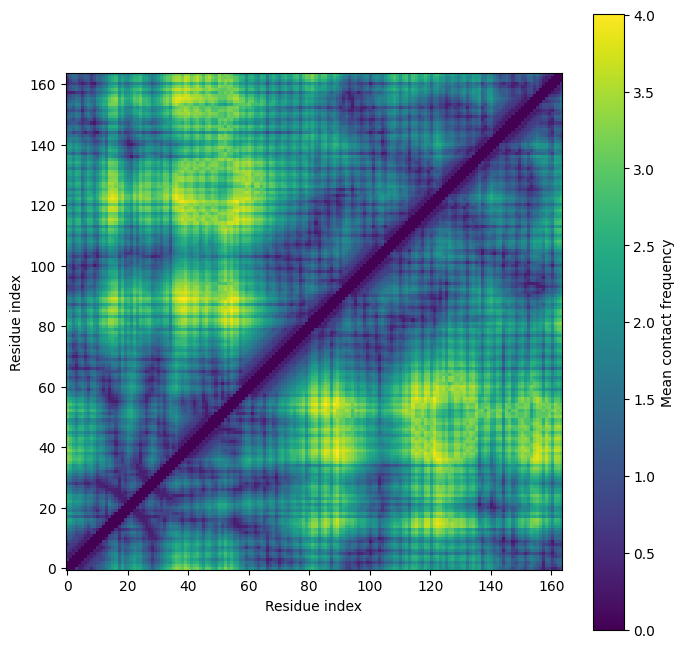

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the contact distances for each frame
distances, residue_pairs = md.compute_contacts(traj[:10], scheme='closest-heavy')

# Average over all frames to get the mean contact map
mean_distances = distances.mean(axis=0)

# Create an empty 2D array for the contact map
distance_map = np.zeros((traj.topology.n_residues, traj.topology.n_residues))

# Fill the contact map with the mean contacts
for (i, j), distance in zip(residue_pairs, mean_distances):
    distance_map[i, j] = distance
    distance_map[j, i] = distance

# Plot the contact map
plt.figure(figsize=(8, 8))
plt.imshow(distance_map, cmap='viridis', origin='lower')
plt.colorbar(label='Mean contact frequency')
plt.xlabel('Residue index')
plt.ylabel('Residue index')
plt.show()